# K Nearest Neighbours

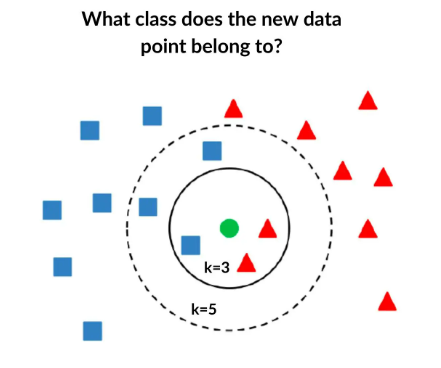

### Choosing the Value of k:
 - A small 𝑘 (e.g., 1 or 3) makes the model sensitive to noise.
 - A large 𝑘 provides smoother decision boundaries but may ignore local patterns.

We have to select middle K value to better performance.

Advantages: <br/>
✔️ Simple and easy to implement <br/>
✔️ No need for training (lazy learning) <br/>
✔️ Works well with small datasets <br/>
✔️ Effective for non-linear decision boundaries <br/>

Disadvantages: <br/>
❌ Computationally expensive (high memory usage) <br/>
❌ Slow with large datasets (distance calculation for every query) <br/>
❌ Sensitive to irrelevant features and different feature scales (needs feature normalization) <br/>

Use Cases: 
 - Handwritten digit recognition (e.g., MNIST dataset) 
 - Recommendation systems (e.g., movie recommendations) 
 - Medical diagnosis (e.g., classifying diseases based on patient symptoms) 
 - Anomaly detection 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [6]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
x = data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
x = scaler.fit_transform(x)
x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.shape

(120, 4)

In [19]:
x_test.shape

(30, 4)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred = knn.predict(x_test)
pred[0:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
y_test[0:5]

118     Iris-virginica
77     Iris-versicolor
39         Iris-setosa
62     Iris-versicolor
123     Iris-virginica
Name: Species, dtype: object

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.8666666666666667

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[ 6,  0,  0],
       [ 0,  8,  1],
       [ 0,  3, 12]])

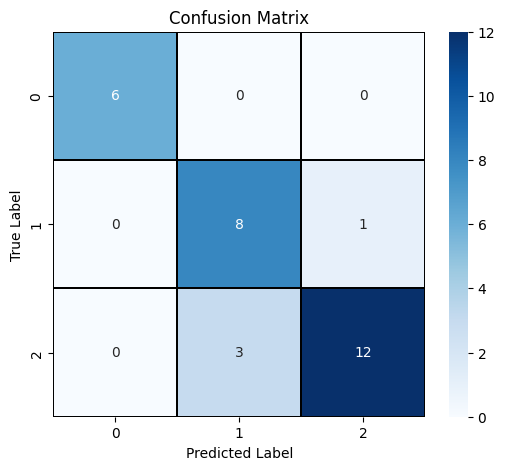

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.01, linecolor='black')

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [36]:
correct_sum = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    correct_sum.append(accuracy_score(y_test, pred))

In [37]:
correct_sum

[0.8666666666666667,
 0.7666666666666667,
 0.8333333333333334,
 0.8,
 0.9,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7,
 0.7,
 0.7,
 0.7]

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.9